In [1]:
using Pkg
Pkg.activate("..")

using Flux

using CSV
using DataFrames

using Random
Random.seed!(42)

df = CSV.read("data1.csv", DataFrame)
x = Matrix(df[:, 1:2])
x = [x[i, :] for i in 1:size(x, 1)]
y = df[:, 3]

X = hcat(x...)
y_train = Flux.onehotbatch(y, unique(y))
y_train = Flux.unstack(y_train',1)

  Activating project at `C:\Users\Lenovo\Desktop\SP\LaplaceRedux.jl\dev`


100-element Vector{Vector{Bool}}:
 [1, 0, 0, 0]
 [1, 0, 0, 0]
 [1, 0, 0, 0]
 [1, 0, 0, 0]
 [1, 0, 0, 0]
 [1, 0, 0, 0]
 [1, 0, 0, 0]
 [1, 0, 0, 0]
 [1, 0, 0, 0]
 [1, 0, 0, 0]
 [1, 0, 0, 0]
 [1, 0, 0, 0]
 [1, 0, 0, 0]
 ⋮
 [0, 0, 0, 1]
 [0, 0, 0, 1]
 [0, 0, 0, 1]
 [0, 0, 0, 1]
 [0, 0, 0, 1]
 [0, 0, 0, 1]
 [0, 0, 0, 1]
 [0, 0, 0, 1]
 [0, 0, 0, 1]
 [0, 0, 0, 1]
 [0, 0, 0, 1]
 [0, 0, 0, 1]

In [2]:
data = zip(x,y_train)
n_hidden = 3
D = size(X,1)
out_dim = length(unique(y))
nn = Chain(
    Dense(D, n_hidden, σ),
    Dense(n_hidden, out_dim)
)  
loss(x, y) = Flux.Losses.logitcrossentropy(nn(x), y)

loss (generic function with 1 method)

In [ ]:
using Flux.Optimise: update!, Adam
using Statistics
opt = Adam()
epochs = 200
avg_loss(data) = mean(map(d -> loss(d[1],d[2]), data))
show_every = epochs/10

for epoch = 1:epochs
    for d in data
        gs = gradient(Flux.params(nn)) do
            l = loss(d...)
        end
        update!(opt, Flux.params(nn), gs)
    end
    if epoch % show_every == 0
        println("Epoch " * string(epoch))
        @show avg_loss(data)
    end
end

In [3]:
py_layer1 = [[-2.7541,  0.5183],
         [ 3.5415,  0.1424],
         [ 0.1192, -4.3529]]

py_layer1 = hcat(py_layer1...)
py_layer1 = py_layer1'

py_layer2 = [-0.9672,  1.5726, -2.0302]

py_layer3 = [[-5.3452,  2.9503, -8.0299],
         [ 0.5926, -7.3648,  4.3767],
         [-5.9890,  0.3879,  3.8754],
         [ 3.0135, -6.8771, -7.4405]]
py_layer3 = hcat(py_layer3...)
py_layer3 = py_layer3'

py_layer4 = [ 1.5361, -1.5164, -1.5870,  1.8060]

4-element Vector{Float64}:
  1.5361
 -1.5164
 -1.587
  1.806

In [4]:
Flux.params(nn)[1] .= py_layer1
Flux.params(nn)[2] .= py_layer2
Flux.params(nn)[3] .= py_layer3
Flux.params(nn)[4] .= py_layer4

4-element Vector{Float32}:
  1.5361
 -1.5164
 -1.587
  1.806

In [5]:
using LaplaceRedux
la = Laplace(nn; likelihood=:classification)
fit!(la, data)
optimize_prior!(la; verbose=true, n_steps=1000)

[ Info: Precompiling LaplaceRedux [c52c1a26-f7c5-402b-80be-ba1e638ad478]
[ Info: Iteration 100: P₀=0.024387528670763547, σ=1.0


loss(exp.(logP₀), exp.(logσ)) = 5.225726009146256
Log likelihood: -0.3166475598676567
Log det ratio: 0.16987995036078019
Scatter: 9.648276948196418
loss(exp.(logP₀), exp.(logσ)) = 2.5847295100913334
Log likelihood: -0.3166475598676567
Log det ratio: 0.3775747594883967
Scatter: 4.158589140958957


[ Info: Iteration 200: P₀=0.010511484325086756, σ=1.0


loss(exp.(logP₀), exp.(logσ)) = 1.8707147930313242
Log likelihood: -0.3166475598676567
Log det ratio: 0.597578259971101
Scatter: 2.510556206356234
loss(exp.(logP₀), exp.(logσ)) = 1.6170471991874922
Log likelihood: -0.3166475598676567
Log det ratio: 0.7984344812433619
Scatter: 1.8023647973963086
loss(exp.(logP₀), exp.(logσ)) = 1.5205998379293528
Log likelihood: -0.3166475598676567
Log det ratio: 0.962146595398309
Scatter: 1.445757960725083
loss(exp.(logP₀), exp.(logσ)) = 1.4843377668715583
Log likelihood: -0.3166475598676567
Log det ratio: 1.0836050118748517
Scatter: 1.2517754021329517


[ Info: Iteration 300: P₀=0.00634582338284985, σ=1.0
[ Info: Iteration 400: P₀=0.0045557588580512395, σ=1.0
[ Info: Iteration 500: P₀=0.003654379316377167, σ=1.0
[ Info: Iteration 600: P₀=0.0031640580668220314, σ=1.0


loss(exp.(logP₀), exp.(logσ)) = 1.4713885975852095
Log likelihood: -0.3166475598676567
Log det ratio: 1.1666032567508466
Scatter: 1.1428788186842587
loss(exp.(logP₀), exp.(logσ)) = 1.4671042303537174
Log likelihood: -0.3166475598676567
Log det ratio: 1.2192182964165568
Scatter: 1.0816950445555646
loss(exp.(logP₀), exp.(logσ)) = 1.4658135309558862
Log likelihood: -0.3166475598676567
Log det ratio: 1.2502844580500323
Scatter: 1.048047484126427
loss(exp.(logP₀), exp.(logσ)) = 1.4654641478073445
Log likelihood: -0.3166475598676567
Log det ratio: 1.2674005114191402
Scatter: 1.0302326644602355


[ Info: Iteration 700: P₀=0.002888804924187103, σ=1.0
[ Info: Iteration 800: P₀=0.002734153367877044, σ=1.0
[ Info: Iteration 900: P₀=0.0026491038974822043, σ=1.0
[ Info: Iteration 1000: P₀=0.0026040741551037025, σ=1.0


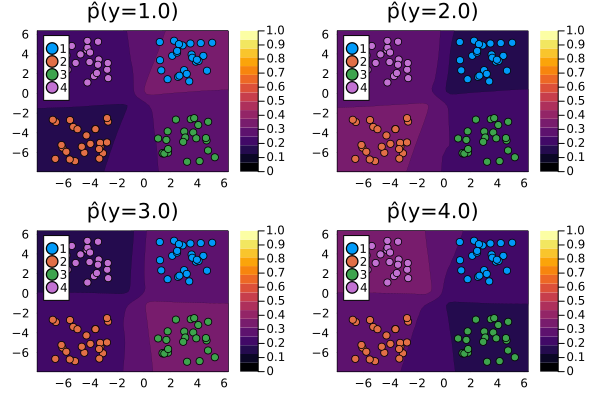

In [6]:
using Plots
_labels = sort(unique(y))
plt_list = []
for target in _labels
    plt = plot(la, X, y; target=target, clim=(0,1))
    push!(plt_list, plt)
end
plot(plt_list...)

In [7]:
predictions_probit = reduce(hcat, predict(la, X))
predictions_probit = reshape(predictions_probit, 4, 100)

4×100 Matrix{Float64}:
 0.364618  0.368099  0.366863  0.368081  …  0.216661  0.216711  0.216718
 0.164389  0.163598  0.163993  0.163609     0.257075  0.257043  0.25704
 0.262035  0.261322  0.261278  0.261309     0.166012  0.166038  0.166041
 0.208958  0.206981  0.207866  0.207001     0.360252  0.360208  0.360201

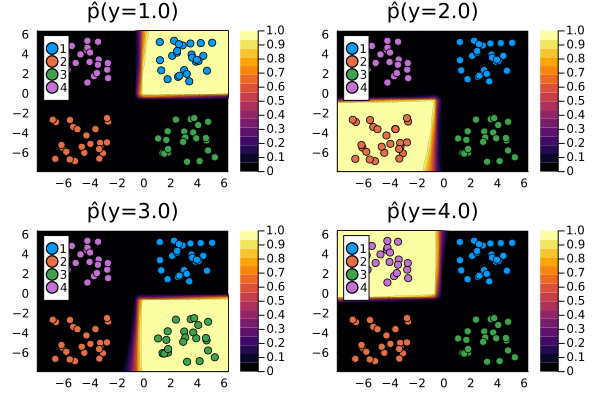

In [8]:
_labels = sort(unique(y))
plt_list = []
for target in _labels
    plt = plot(la, X, y; target=target, clim=(0,1), link_approx=:plugin)
    push!(plt_list, plt)
end
plot(plt_list...)

In [9]:
predictions_plugin = reduce(hcat, predict(la, X, link_approx=:plugin))
predictions_plugin = reshape(predictions_plugin, 4, 100)

4×100 Matrix{Float64}:
 0.996563    0.996545    0.996557    0.996545    …  0.000179636  0.000179702
 1.67368e-6  1.56004e-6  1.63622e-6  1.56281e-6     0.00319589   0.00319498
 0.00335778  0.00338301  0.00336643  0.0033827      4.15063e-6   4.15065e-6
 7.77686e-5  7.04509e-5  7.53181e-5  7.0618e-5      0.99662      0.996621

In [10]:
fμ, fvar = glm_predictive_distribution(la, X)

([4.423090576956424 4.486165476887683 … -3.8057652938291877 -3.805873866752483; -8.873953181762996 -8.881173750240514 … -0.9270769126207038 -0.927841712037154; -1.2699402257766677 -1.1993627116325856 … -7.5734381192258144 -7.573910786757107; -5.035238753078503 -5.070967622700069 … 4.81542713694096 4.814949704004084], [743.8652612060955 691.9817527438273 … 731.8377390277866 731.9046229853664; 689.5692600693341 688.0552528758785 … 764.2358730171319 764.3502335342355; 789.1908872773188 725.0665841250899 … 604.6546748273745 604.6981509241909; 722.6844467841568 705.6280024376138 … 729.4875213557148 729.593433709093])

In [11]:
@show fμ

fμ = [4.423090576956424 4.486165476887683 4.443674731667537 4.484612556056829 4.477839994265484 4.486377466524603 4.481124561864351 4.486329636429604 4.482369365140613 4.4666667467476335 4.467781235890392 3.5401267342081133 4.466368425119182 4.484477301141952 4.486160466911278 4.485553737691663 4.485771552235472 4.4506998728944875 4.486255716880294 4.485280344883077 4.486301831810518 4.2991423155527935 4.093084507708902 4.48618285540587 4.478194012957866 -11.799243518951075 -11.838917090464282 -11.83475268540967 -11.83898714392255 -11.835712064739413 -11.838877733984855 -11.837499456467462 -11.838357070315652 -11.838062938765708 -11.808887220650668 -11.810714624872995 -11.768566010221123 -11.838569858216523 -11.838655753373347 -11.838893862297864 -11.815748150313103 -11.813026694350919 -11.837778787348775 -11.834674993805052 -11.838964730890783 -11.747203467903162 -11.794496521084845 -11.838061342353079 -11.838990551162965 -11.838994354189524 -3.5430879785968736 -3.5435888582868724 -3.

4×100 Matrix{Float64}:
  4.42309   4.48617   4.44367   4.48461  …  -3.8091  -3.80577   -3.80587
 -8.87395  -8.88117  -8.87599  -8.88095     -0.9238  -0.927077  -0.927842
 -1.26994  -1.19936  -1.24678  -1.20101     -7.576   -7.57344   -7.57391
 -5.03524  -5.07097  -5.04667  -5.07015      4.8195   4.81543    4.81495

In [12]:
@show fvar

fvar = [743.8652612060955 691.9817527438273 705.6359740438795 691.996266766062 692.9042034289065 691.9807678930752 692.0434875492886 691.9808303506029 692.0239123015194 696.8318468576366 695.1552658855774 7529.62623852911 695.8863713374285 692.0355221290938 691.981267588287 691.9886040294778 691.9846585445837 694.2390256434103 691.9809527501443 691.9844153360259 691.9809854751626 788.7796221940113 1377.3074622541965 691.9812021996063 692.3261714558159 1117.8570687833408 1114.1629144521676 1113.7502901542775 1114.1708985302273 1113.8784095209276 1114.1560574099683 1114.0058772951097 1114.0883674548659 1114.0947934818992 1123.9135459936124 1114.1566423766267 1191.4576570613526 1114.135055416393 1114.1264967187972 1114.157755398887 1118.3820856481852 1121.7053235959484 1114.0864762150416 1113.7467651584416 1114.1676635707463 1204.4306320420133 1149.4981040658388 1114.0505071691898 1114.1714022087908 1114.1719065593056 1083.974671786114 1084.0112130142645 1084.01232765662 1083.953297477647

4×100 Matrix{Float64}:
 743.865  691.982  705.636  691.996  …  731.604  732.112  731.838  731.905
 689.569  688.055  688.772  688.073     763.955  764.494  764.236  764.35
 789.191  725.067  741.545  725.062     604.494  604.865  604.655  604.698
 722.684  705.628  710.321  705.644     729.237  729.723  729.488  729.593

In [13]:
@show la.H

la.H = [2.7779571178136925e-8 3.428920784061061e-10 -8.358766004795372e-10 8.955047251559692e-8 -2.166000889435435e-9 -2.7258797625975897e-10 2.057098347305559e-8 1.9403676472207582e-10 -1.48263141026037e-10 -3.185359701793279e-8 1.1231203097867388e-7 4.404236720021929e-8 -1.2450080151015635e-7 6.417581184130059e-7 2.9065741778906177e-8 -6.806946837468408e-7 9.870852780943306e-9 7.256364363030741e-8 -1.7794458310052097e-9 -9.184007601515307e-8 2.105587793051288e-8 6.502702084107666e-7 1.4028099289193737e-7 -6.713129016626011e-7 -1.192383247802685e-7; 3.428920784061061e-10 1.451538193565189e-9 -2.0552902262104243e-10 -2.1660009455893378e-9 2.4007509695122443e-9 -1.8456100998204342e-10 1.940367108735749e-10 1.1294683359821702e-9 -5.067470773326898e-11 1.832470305259514e-8 4.2443910262643586e-8 -2.9499781101023117e-8 -3.126883202409952e-8 1.6431420015764253e-7 -2.6119026722600266e-8 -1.2713262953073833e-7 -1.1062549965590476e-8 -6.427561893399233e-8 2.0215249258271257e-8 7.792644156764557

25×25 Matrix{Float64}:
  2.77796e-8    3.42892e-10  -8.35877e-10  …  -6.71313e-7   -1.19238e-7
  3.42892e-10   1.45154e-9   -2.05529e-10     -1.39403e-7   -4.13269e-8
 -8.35877e-10  -2.05529e-10   4.41009e-8       7.40614e-7    9.85973e-7
  8.95505e-8   -2.166e-9     -2.72588e-10      3.57948e-8    2.78373e-7
 -2.166e-9      2.40075e-9   -1.84561e-10     -9.6192e-7    -8.44814e-8
 -2.72588e-10  -1.84561e-10   2.57901e-9   …   2.87477e-7   -9.88894e-8
  2.0571e-8     1.94037e-10  -1.48263e-10     -3.48257e-7    5.73679e-8
  1.94037e-10   1.12947e-9   -5.06747e-11     -9.27032e-8    1.78121e-9
 -1.48263e-10  -5.06747e-11   8.70138e-10      2.1612e-7    -1.99546e-7
 -3.18536e-8    1.83247e-8   -4.26911e-8      -3.44941e-6   -1.53015e-5
  1.12312e-7    4.24439e-8   -9.87973e-7   …  -6.05792e-5   -0.000444777
  4.40424e-8   -2.94998e-8    5.81453e-8       1.90047e-5    4.50239e-5
 -1.24501e-7   -3.12688e-8    9.72519e-7       4.50239e-5    0.000415055
  6.41758e-7    1.64314e-7   -6.83242e-

In [14]:
@show la.P₀

la.P₀ = [0.0026040741551037025 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0026040741551037025 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0026040741551037025 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0026040741551037025 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0026040741551037025 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0026040741551037025 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 0.0026040741551037025 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0026040741551037025 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.00260

25×25 LinearAlgebra.Diagonal{Float64, Vector{Float64}}:
 0.00260407   ⋅           ⋅          …   ⋅           ⋅           ⋅ 
  ⋅          0.00260407   ⋅              ⋅           ⋅           ⋅ 
  ⋅           ⋅          0.00260407      ⋅           ⋅           ⋅ 
  ⋅           ⋅           ⋅              ⋅           ⋅           ⋅ 
  ⋅           ⋅           ⋅              ⋅           ⋅           ⋅ 
  ⋅           ⋅           ⋅          …   ⋅           ⋅           ⋅ 
  ⋅           ⋅           ⋅              ⋅           ⋅           ⋅ 
  ⋅           ⋅           ⋅              ⋅           ⋅           ⋅ 
  ⋅           ⋅           ⋅              ⋅           ⋅           ⋅ 
  ⋅           ⋅           ⋅              ⋅           ⋅           ⋅ 
  ⋅           ⋅           ⋅          …   ⋅           ⋅           ⋅ 
  ⋅           ⋅           ⋅              ⋅           ⋅           ⋅ 
  ⋅           ⋅           ⋅              ⋅           ⋅           ⋅ 
  ⋅           ⋅           ⋅              ⋅           ⋅      

In [15]:
using LaplaceRedux.Curvature
𝐉, fμ = Curvature.jacobians(la.curvature, X)
@show 𝐉

𝐉 = [-0.14119480550289154 0.01565367728471756 -0.1582009345293045 0.07960236072540283 -0.0009967677760869265 0.00011050746979890391 -0.0011168229393661022 0.0005619545700028539 -0.08937378972768784 0.009908498264849186 -0.10013836622238159 0.05038687214255333 -0.005192532204091549 0.0005756743485108018 -0.005817944183945656 0.0029274295084178448 -0.024760577827692032 0.0027451016940176487 -0.02774285152554512 0.013959440402686596 -0.00011513276695040986 1.2764287930622231e-5 -0.00012899986177217215 6.490918894996867e-5 -0.010799111798405647 0.0011972524225711823 -0.012099805288016796 0.006088288966566324 -0.00031217624200508 3.460967491264455e-5 -0.0003497761208564043 0.0001759977312758565 -0.00902992021292448 0.001001109485514462 -0.010117524303495884 0.0050908601842820644 -0.051462139934301376 0.005705392453819513 -0.05766047164797783 0.02901316247880459 -0.04590202122926712 0.005088965408504009 -0.05143066495656967 0.02587849646806717 -0.9223551154136658 0.10225765407085419 -1.03344

25×400 adjoint(::Matrix{Float64}) with eltype Float64:
 -0.141195      0.0156537    -0.158201     …   0.0050903    -0.0025613
 -0.333466      0.03697      -0.37363         -0.00579104    0.00291389
  0.000215963  -0.000539107   2.83945e-5      -0.000548177   0.00971867
  0.00051005   -0.00127323    6.70604e-5       0.00062364   -0.0110565
 -2.52577e-10   1.37667e-10   1.21899e-10     -1.5487e-6     2.9734e-6
 -5.96522e-10   3.25134e-10   2.87894e-10  …   1.7619e-6    -3.38272e-6
 -0.0624663     0.00692538   -0.06999         -0.00188482    0.000948389
  9.55448e-5   -0.000238507   1.25621e-5       0.000202977  -0.00359859
 -1.11743e-10   6.09056e-11   5.39296e-11      5.73448e-7   -1.10098e-6
  0.0118263     0.0           0.0              0.0           0.0
  0.999968      0.0           0.0          …   0.0           0.0
  1.39159e-11   0.0           0.0              0.0           0.0
  0.0           0.0118263     0.0              0.0           0.0
  0.0           0.999968      0.0      